In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from datetime import datetime
from sklearn.decomposition import PCA

In [9]:
def get_transformed_data():
    print("Transformed Data")
    
    df = pd.read_csv('C:/Users/TANNERU/Downloads/train.csv/train.csv')
    #print(df)
    data = df.values.astype(np.float32)
    #print(data)
    
    np.random.shuffle(data)
    
    
    X = data[:,1:]
    Y = data[:,0].astype(np.int32)
    print("Innputs",X)
    print("output",Y)
    print(X.shape) #(42000, 784)
    print(Y.shape) #(42000,)
    
    
    Xtrain = X[:-1000]
    Xtest = X[-1000:]
    Ytrain = Y[:-1000]
    Ytest = Y[-1000:]
    print("Xtrain",Xtrain.shape)#(41000, 784)
    print("Xtest",Xtest.shape)#(1000, 784)
    print("Ytrain",Ytrain.shape)#(41000,)
    print("Ytest",Ytest.shape) #(1000,)
    
    
    mu = Xtrain.mean(axis = 0) #(784,)
    #print(mu)
    print(mu.shape)#(784,)
    
    
    #center the data
    Xtrain = Xtrain - mu
    Xtest = Xtest - mu
    #print(Xtrain)
    #print(Xtest)
    
    #transforming data
    pca = PCA()
    Ztrain = pca.fit_transform(Xtrain)
    Ztest = pca.transform(Xtest)
    print(Ztrain.shape)
    print(Ztest.shape)
    #print(Ztrain)
    #print(Ztest)
    
    #plot_cumulative_variance(pca)
    
    
    
    Ztrain = Ztrain[:,:300]
    Ztest = Ztest[:,:300]
    print(Ztrain.shape) #(41000, 300)
    print(Ztest.shape) # (1000, 300)
    
    
    #normalization
    mean = Ztrain.mean(axis = 0)
    std = Ztrain.std(axis = 0)
    
    Ztrain = (Ztrain - mean)/std
    Ztest = (Ztest - mean)/std
    
    
    return Ztrain,Ztest,Ytrain,Ytest

In [10]:
def forward(X,w,b):
    #softmax
    a = X.dot(w)+b
    expA = np.exp(a)
    y = expA/expA.sum(axis = 1,keepdims = True)
    return y



def predict(p_y):
    return np.argmax(p_y,axis = 1)


def error_rate(p_y,t):
    prediction = predict(p_y)
    return np.mean(prediction != t)


def cost(p_y,t):
    tot = -t*np.log(p_y)
    return tot.sum()


def gradw(t,y,X):
    return X.T.dot(t-y)


def gradb(t,y):
    return (t-y).sum(axis = 0)


def y2indicator(y):
    N = len(y)
    y = y.astype(np.int32)
    ind = np.zeros((N,10))
    for i in range(N):
        ind[i,y[i]] = 1
    return ind


In [11]:
get_transformed_data()

Transformed Data
Innputs [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
output [2 7 6 ... 6 8 0]
(42000, 784)
(42000,)
Xtrain (41000, 784)
Xtest (1000, 784)
Ytrain (41000,)
Ytest (1000,)
(784,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(41000, 784)
(1000, 784)
[[-1.84754013e+02 -8.02726257e+02 -5.39397888e+01 ...  4.23098123e-03
  -0.00000000e+00 -0.00000000e+00]
 [ 2.04950058e+02  8.34076477e+02 -1.27717415e+02 ... -2.35413856e-04
  -3.37017205e-04  8.43522284e-05]
 [ 6.99396240e+02  1.53998871e+02  5.84375305e+02 ... -4.62669705e-05
   4.62577475e-04 -2.10094353e-04]
 ...
 [ 6.00134583e+01  1.28022595e+03 -3.849

(array([[-0.3193007 , -1.6175828 , -0.11742064, ..., -1.293032  ,
          0.34524918, -1.1809012 ],
        [ 0.35420415,  1.6807578 , -0.2780255 , ...,  1.7539368 ,
          1.8303059 ,  2.4145687 ],
        [ 1.2087293 ,  0.3103253 ,  1.2721133 , ..., -0.19047563,
         -0.5807255 , -1.0350432 ],
        ...,
        [ 0.10371792,  2.5797987 , -0.0837995 , ..., -0.8012042 ,
          0.07621013, -0.98067707],
        [ 0.06209836,  0.52233374,  0.4191837 , ..., -0.51626474,
          0.90385026, -0.11732495],
        [-1.3844553 , -0.00485793, -0.33587274, ...,  0.5684533 ,
         -0.614243  , -0.22335804]], dtype=float32),
 array([[-0.42313316,  1.3205231 ,  0.5508775 , ..., -0.0904577 ,
          0.37805763, -0.7211976 ],
        [ 0.44760376, -0.27577314,  0.65603673, ...,  1.676929  ,
         -0.08562984, -0.17807841],
        [-1.6526908 , -1.3320965 ,  0.5492824 , ..., -0.3737937 ,
          0.7304006 ,  0.39699456],
        ...,
        [ 0.19152348,  0.12974958,  2.2

In [37]:
def main():
    Xtrain,Xtest,Ytrain,Ytest = get_transformed_data()
    print("Xtrain",Xtrain.shape)
    print("Xtest",Xtest.shape)
    print("Ytrain",Ytrain.shape)
    print("Ytest",Ytest.shape) 
    
    
    N,D = Xtrain.shape #(41000, 300)
    
    #converting targets to indicators
    Ytrain_ind = y2indicator(Ytrain)
    Ytest_ind = y2indicator(Ytest)
    print(Ytrain_ind.shape)#(41000, 10)
    print(Ytest_ind.shape)#(1000, 10)
    
    
    #1.Full 
    
    w = np.random.randn(D,10)/np.sqrt(D)
    b = np.zeros(10)
    
    LL = []
    lr = 0.0001
    reg = 0.01
    t0 = datetime.now()
    
    
    for i in range(50):
        #training
        p_y = forward(Xtrain,w,b)
        
        w += lr*(gradw(Ytrain_ind,p_y,Xtrain)-reg*w)
        b += lr*(gradb(Ytrain_ind,p_y))
        
        
        #testing
        p_y_test = forward(Xtest,w,b)
        
        ll = cost(p_y_test,Ytest_ind)
        LL.append(ll)
        
        
        if i % 1 == 0:
            err = error_rate(p_y_test,Ytest)
            if i % 10 ==0:
                print("iterations : ",i,"cost:",ll)
                print("error rate",err)
                
                
                
    p_y = forward(Xtest,w,b)
    print("Final Error rate",error_rate(p_y,Ytest))
    print("time for FULL GD",datetime.now()-t0)
        
        
     #2 Stochastic
    print("--------------------SGD------------------")
    
    w = np.random.randn(D,10)/np.sqrt(D)
    b = np.zeros(10)
    
    LL_stochastic = []
    lr = 0.0001
    reg = 0.01
    t0 = datetime.now()
    
    
    for i in range(50):
        tmp_x,tmp_y =  shuffle(Xtrain,Ytrain_ind)
        for n in range(min(N,500)):
            x = tmp_x[n,:].reshape(1,D) # d= 300
            y = tmp_y[n,:].reshape(1,10)
            #print(x.shape) #(1,300)
            #print(y.shape) #(1,10)
            
            
            p_y = forward(x,w,b)
            
            
            w += lr*(gradw(y,p_y,x)-reg*w)
            b += lr*(gradb(y,p_y)-reg*b)
            
            
            p_y_test = forward(Xtest,w,b)
            ll = cost(p_y_test,Ytest_ind)
            LL_stochastic.append(ll)
            
            
        if i % 1 == 0 :
            err = error_rate(p_y_test,Ytest)
            if i % 10 == 0:
                print("iterations : ",i,"cost:",ll)
                print("error rate",err)
    
    
    
    p_y = forward(Xtest,w,b)
    print("Final Error rate",error_rate(p_y,Ytest))
    print("time for stochastic GD",datetime.now() - t0)


    
    # 3batch SGD
    print("-----------------batchSGD--------------")
    
    
    w = np.random.randn(D,10)/np.sqrt(D)
    b = np.zeros(10)
    
    LL_batch = []
    lr = 0.0001
    reg = 0.01
    t0 = datetime.now()
    
    batch_sz = 500
    n_batches = N // batch_sz # 82 batches(41000//500)
    
    
    for i in range(50):
        tmpX ,tmpY = shuffle(Xtrain,Ytrain_ind)
        for j in range(n_batches):
            x = tmpX[j*batch_sz:(j*batch_sz+batch_sz),:]
            y = tmpY[j*batch_sz:(j*batch_sz+batch_sz),:]
            
            
            p_y = forward(x,w,b)
            
            
            w += lr*(gradw(y,p_y,x)-reg*w)
            b += lr*(gradb(y,p_y)-reg*b)
            
            
            p_y_test = forward(Xtest,w,b)
            ll = cost(p_y_test,Ytest_ind)
            LL_batch.append(ll)
            
            
        if i % 1 == 0 :
            err = error_rate(p_y_test,Ytest)
            if i % 10 == 0:
                print("iterations : ",i,"cost:",ll)
                print("error rate",err)
    
    
    
    p_y = forward(Xtest,w,b)
    print("Final Error rate",error_rate(p_y,Ytest))
    print("time for batch SGD  ",datetime.now() - t0)

     
    
    x1 = np.linspace(0,1,len(LL))
    plt.plot(x1,LL,label = "full")
    x2 = np.linspace(0,1,len(LL_stochastic))
    plt.plot(x2,LL_stochastic,label = 'SGD')
    x3 = np.linspace(0,1,len(LL_batch))
    plt.plot(x3,LL_batch,label = 'Batch SGD')
    plt.legend()
    plt.show()
    

Transformed Data
Innputs [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
output [4 9 3 ... 8 1 3]
(42000, 784)
(42000,)
Xtrain (41000, 784)
Xtest (1000, 784)
Ytrain (41000,)
Ytest (1000,)
(784,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(41000, 784)
(1000, 784)
[[-5.17321472e+02  3.81705139e+02 -1.52884369e+02 ...  4.23631864e-03
  -0.00000000e+00  0.00000000e+00]
 [-2.27320614e+01  1.16578943e+03  1.12902046e+02 ... -4.32994602e-05
   6.62878156e-04 -1.52052497e-04]
 [ 1.00472076e+02 -5.23445473e+01  1.72757004e+02 ... -2.38533285e-05
   1.78052142e-05  3.13539349e-04]
 ...
 [ 8.82785461e+02 -7.54858170e+01  1.097

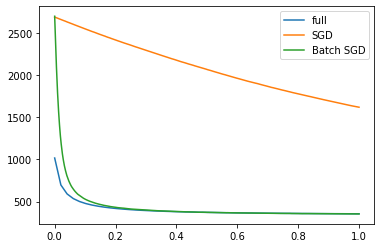

In [38]:
main()

In [29]:
41000//500

82